# Analysis Challenge Assignment 3
#### **Authors**: Yutong Shen, Jingfei Chen, Yiran Wang

**Tasks:**

- Identify and alleviate barriers to educational achievement
- Develop a more data-based approach to decision making
- Identify clusters of similar colleges and universities

**Following the task instructions, in ACA3, we developed our approach as follows:**

**Variables:**


- **'CONTROL':** Control of institution,
- **'LOCALE':** Locale of institution,
- **'CCSIZSET':** Carnegie Classification -- size and setting,
- **'DISTANCEONLY':** Flag for distance-education-only education,
- **'NPT4_PUBPRIV':** Average net price for Title IV institutions, 
- **'NPT41_PUBPRIV':** Average net price for $0-30,000 family income,
- **'NUM4_PUBPRIV':** Number of Title IV students,
- **'COSTT4':** Average cost of attendance,
- **'PFTFAC':** Proportion of faculty that is full-time,
- **'AVGFACSAL':** Average faculty salary,
- **'TUITFTE':** Net tuition revenue per full-time equivalent student,
- **'INEXPFTE':** Instructional expenditures per full-time equivalent student,
- **'C150_4_POOLED':** Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion/6 years), pooled for two year rolling averages, 
- **'PCTFLOAN':** Percent of all federal undergraduate students receiving a federal student loan.


**Algorithm:** Principal Component Analysis




**1. Import Data**

In [ ]:
# Import the packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Import data
data = pd.read_csv("CollegeScorecard.csv")
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,sch_deg,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,LOCALE,locale2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,...,mn_earn_wne_indep1_p6,mn_earn_wne_male0_p6,mn_earn_wne_male1_p6,count_nwne_p7,count_wne_p7,mn_earn_wne_p7,sd_earn_wne_p7,gt_25k_p7,count_nwne_p8,count_wne_p8,mn_earn_wne_p8,md_earn_wne_p8,pct10_earn_wne_p8,pct25_earn_wne_p8,pct75_earn_wne_p8,pct90_earn_wne_p8,sd_earn_wne_p8,gt_25k_p8,count_nwne_p9,count_wne_p9,mn_earn_wne_p9,sd_earn_wne_p9,gt_25k_p9,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,LO_INC_RPY_3YR_RT_SUPP,MD_INC_RPY_3YR_RT_SUPP,HI_INC_RPY_3YR_RT_SUPP,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,NaN,0,1,1,3,4,1,1,5,12.0,NaN,34.7834,-86.5685,18.0,9.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8989,0.8989,370.0,450.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19500,33611.5,373.1565536,0.44471387,0.448163265,0.446488294,0.422018349,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,NaN,0,1,1,3,4,1,1,5,12.0,NaN,33.5022,-86.8092,15.0,8.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8673,0.8673,520.0,640.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16250,23117,256.6460899,0.756266667,0.724256293,0.770134228,0.818059299,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,NaN,0,1,1,3,4,2,1,5,12.0,NaN,32.3626,-86.1740,21.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10500,PrivacySuppressed,PrivacySuppressed,0.647249191,0.597701149,0.709090909,PrivacySuppressed,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,NaN,0,1,1,3,4,1,1,5,12.0,NaN,34.7228,-86.6384,15.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8062,0.8062,510.0,640.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16500,24738,274.6425129,0.781997919,0.721404304,0.824742268,0.851936219,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,NaN,0,1,1,3,4,1,1,5,12.0,NaN,32.3643,-86.2957,18.0,9.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5125,0.5125,380.0,480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15854.5,33452,371.3857766,0.331198862,0.310875332,0.376106195,0.333333333,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.

**2. Clean Data**

In [ ]:
data[data['CURROPER'] == 1]  # currently operating institutions

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,sch_deg,HCM2,main,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,st_fips,region,LOCALE,locale2,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,...,mn_earn_wne_indep1_p6,mn_earn_wne_male0_p6,mn_earn_wne_male1_p6,count_nwne_p7,count_wne_p7,mn_earn_wne_p7,sd_earn_wne_p7,gt_25k_p7,count_nwne_p8,count_wne_p8,mn_earn_wne_p8,md_earn_wne_p8,pct10_earn_wne_p8,pct25_earn_wne_p8,pct75_earn_wne_p8,pct90_earn_wne_p8,sd_earn_wne_p8,gt_25k_p8,count_nwne_p9,count_wne_p9,mn_earn_wne_p9,sd_earn_wne_p9,gt_25k_p9,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,LO_INC_RPY_3YR_RT_SUPP,MD_INC_RPY_3YR_RT_SUPP,HI_INC_RPY_3YR_RT_SUPP,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,NaN,0,1,1,3,4,1,1,5,12.0,NaN,34.7834,-86.5685,18.0,9.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8989,0.8989,370.0,450.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19500,33611.5,373.1565536,0.44471387,0.448163265,0.446488294,0.422018349,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,NaN,0,1,1,3,4,1,1,5,12.0,NaN,33.5022,-86.8092,15.0,8.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8673,0.8673,520.0,640.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16250,23117,256.6460899,0.756266667,0.724256293,0.770134228,0.818059299,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,NaN,0,1,1,3,4,2,1,5,12.0,NaN,32.3626,-86.1740,21.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10500,PrivacySuppressed,PrivacySuppressed,0.647249191,0.597701149,0.709090909,PrivacySuppressed,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,NaN,0,1,1,3,4,1,1,5,12.0,NaN,34.7228,-86.6384,15.0,8.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8062,0.8062,510.0,640.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16500,24738,274.6425129,0.781997919,0.721404304,0.824742268,0.851936219,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,NaN,0,1,1,3,4,1,1,5,12.0,NaN,32.3643,-86.2957,18.0,9.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.5125,0.5125,380.0,480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15854.5,33452,371.3857766,0.331198862,0.310875332,0.376106195,0.333333333,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.

We will need to manipulate the data frame into a structure that can be analyzed by our clustering algorithm.


In [ ]:
# Merge NPT4_PUB with NPT4_PRIV, NPT41_PUB with NPT41_PRIV, COSTT4_A with COSTT4_P, and NUM4_PUB with NUM4_PRIV
listRV = ['NPT4_PUB', 'NPT4_PRIV', 'NPT41_PUB', 'NPT41_PRIV', 'COSTT4_A', 'COSTT4_P', 'NUM4_PUB', 'NUM4_PRIV']
for x in listRV:
    data[x] = data[x].fillna(0)
    
data['NPT4_PUBPRIV'] = data['NPT4_PUB'] + data['NPT4_PRIV']
data['NPT41_PUBPRIV'] = data['NPT41_PUB'] + data['NPT41_PRIV']
data['COSTT4'] = data['COSTT4_A'] + data['COSTT4_P']
data['NUM4_PUBPRIV'] = data['NUM4_PUB'] + data['NUM4_PRIV']

**3. Select Variables**

Following the instructions, we selected 15 variables: 'UNITID', 'CONTROL', 'LOCALE', 'CCSIZSET', 'DISTANCEONLY', 'NPT4_PUBPRIV', 'NPT41_PUBPRIV', 'NUM4_PUBPRIV', 'COSTT4', 'PFTFAC', 'AVGFACSAL', 'TUITFTE', 'INEXPFTE', 'C150_4_POOLED', and 'PCTFLOAN'.

In [ ]:
# Select variables
dataS = data[['UNITID', 'CONTROL', 'LOCALE', 'CCSIZSET', 'DISTANCEONLY', 'NPT4_PUBPRIV', 'NPT41_PUBPRIV', 'NUM4_PUBPRIV', 'COSTT4', 'PFTFAC', 
              'AVGFACSAL', 'TUITFTE', 'INEXPFTE', 'C150_4_POOLED', 'PCTFLOAN']]
dataS

,UNITID,CONTROL,LOCALE,CCSIZSET,DISTANCEONLY,NPT4_PUBPRIV,NPT41_PUBPRIV,NUM4_PUBPRIV,COSTT4,PFTFAC,AVGFACSAL,TUITFTE,INEXPFTE,C150_4_POOLED,PCTFLOAN
0,100654,1,12.0,14.0,0.0,13415.0,12683.0,607.0,18888.0,0.8856,7079.0,9063.0,7459.0,0.308718,0.8204
1,100663,1,12.0,15.0,0.0,14805.0,12361.0,893.0,19990.0,0.9106,10170.0,9033.0,17208.0,0.508550,0.5397
2,100690,2,12.0,6.0,0.0,7455.0,6736.0,9.0,12300.0,0.6721,3849.0,12057.0,5123.0,0.285738,0.7629
3,100706,1,12.0,12.0,0.0,17520.0,14652.0,294.0,20306.0,0.6555,9341.0,8322.0,9352.0,0.478211,0.4728
4,100724,1,12.0,13.0,0.0,11936.0,12342.0,889.0,17400.0,0.6641,6557.0,7813.0,7393.0,0.257482,0.8735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7800,48285704,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7801,48285705,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7802,48285706,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


**4. Drop Missing Values**

We need to filter out all the NAs because k-Means won't work if it only sees partial data.

In [ ]:
# Drop missing values
dataNA = dataS.dropna()
dataNA

,UNITID,CONTROL,LOCALE,CCSIZSET,DISTANCEONLY,NPT4_PUBPRIV,NPT41_PUBPRIV,NUM4_PUBPRIV,COSTT4,PFTFAC,AVGFACSAL,TUITFTE,INEXPFTE,C150_4_POOLED,PCTFLOAN
0,100654,1,12.0,14.0,0.0,13415.0,12683.0,607.0,18888.0,0.8856,7079.0,9063.0,7459.0,0.308718,0.8204
1,100663,1,12.0,15.0,0.0,14805.0,12361.0,893.0,19990.0,0.9106,10170.0,9033.0,17208.0,0.508550,0.5397
2,100690,2,12.0,6.0,0.0,7455.0,6736.0,9.0,12300.0,0.6721,3849.0,12057.0,5123.0,0.285738,0.7629
3,100706,1,12.0,12.0,0.0,17520.0,14652.0,294.0,20306.0,0.6555,9341.0,8322.0,9352.0,0.478211,0.4728
4,100724,1,12.0,13.0,0.0,11936.0,12342.0,889.0,17400.0,0.6641,6557.0,7813.0,7393.0,0.257482,0.8735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6237,451741,2,21.0,2.0,0.0,7176.0,7115.0,144.0,11439.0,0.0656,1665.0,3756.0,1195.0,0.588048,0.0000
6238,451750,3,21.0,6.0,0.0,15156.0,14893.0,32.0,21006.0,0.4103,5717.0,13399.0,5489.0,0.217962,0.9010
6239,451769,3,41.0,6.0,0.0,20692.0,17204.0,21.0,26754.0,0.2683,3931.0,22335.0,5171.0,0.396600,0.7786
6289,454184,2,11.0,8.0,0.0,23910.0,22175.0,133.0,44720.0,0.5455,8189.0,10778.0,10645.0,0.590136,0.6151


We scale the variables for PCA to have unit variance.

In [ ]:
from sklearn.preprocessing import StandardScaler

data_noid = dataNA.drop(['UNITID'], axis = 1)

scale= StandardScaler()
# standardization of variables
scaled_data = scale.fit_transform(data_noid) 
print(scaled_data)

[[-1.20738015 -0.87045416  0.95111777 ... -0.18242272 -0.90443873
   1.10433813]
 [-1.20738015 -0.87045416  1.21344218 ...  1.11113608  0.09482427
  -0.29526276]
 [ 0.32921123 -0.87045416 -1.14747756 ... -0.49237793 -1.01935196
   0.81763684]
 ...
 [ 1.86580261  2.1435362  -1.14747756 ... -0.48600899 -0.46498389
   0.89591876]
 [ 0.32921123 -0.97438487 -0.62282873 ...  0.24031585  0.50279865
   0.08068988]
 [ 1.86580261 -0.97438487  0.42646893 ... -0.8144076  -1.25406722
   0.2776412 ]]


**5. Use Scikit-Learn's PCA estimator for dimension reduction**

In [ ]:
from sklearn.decomposition import PCA

# use PCA for dimensionality reduction
pca = PCA(n_components=14)
pca.fit(scaled_data)

print("The principal components are:")
print(pca.components_)
print("The explained variances are:")
print(pca.explained_variance_)

The principal components are:
[[ 2.13918878e-01 -1.06562430e-01  9.05154400e-02 -1.96446950e-02
   4.44381022e-01  3.21258475e-01 -3.16594257e-02  4.56468902e-01
   2.76625754e-02  2.29799367e-01  4.32377112e-01  2.60250745e-01
   3.25775977e-01  9.93637447e-02]
 [-3.95135668e-01 -1.65210630e-02  3.99526477e-01 -3.28823846e-02
  -1.24099386e-01 -2.93000325e-01  3.12608838e-01  9.26005095e-03
   2.65852508e-01  4.00677114e-01 -6.30241592e-02  2.88670046e-01
   2.59891283e-01 -3.12676662e-01]
 [ 4.15100914e-02 -6.22063689e-01  2.71805572e-01  2.19735337e-01
   5.22928459e-02  1.45718477e-01  4.85333791e-01 -1.41314358e-01
  -3.76241240e-01  5.70707630e-02 -1.21922164e-02 -2.00029201e-01
  -1.24452521e-01  9.59241108e-02]
 [ 2.18813073e-01 -2.01502091e-01 -2.33545157e-01  4.41023875e-01
  -1.73620924e-01 -2.67362549e-01 -2.87080712e-01 -7.66640239e-03
  -3.41910761e-01  8.76341209e-02  1.47783479e-01  3.36411511e-01
   1.01745765e-02 -4.67624197e-01]
 [-4.55581183e-02  3.76376575e-01  1.9

From the explained variances, we can see that the first two components explaining substantially more variances than other components. So we will reduce the the data to two dimensions.

In [ ]:
loadings = pd.DataFrame(pca.components_[:2,:].T, columns=['PC1', 'PC2'], index=data_noid.columns)
loadings

,PC1,PC2
CONTROL,0.213919,-0.395136
LOCALE,-0.106562,-0.016521
CCSIZSET,0.090515,0.399526
DISTANCEONLY,-0.019645,-0.032882
NPT4_PUBPRIV,0.444381,-0.124099
NPT41_PUBPRIV,0.321258,-0.293000
NUM4_PUBPRIV,-0.031659,0.312609
COSTT4,0.456469,0.009260
PFTFAC,0.027663,0.265853
AVGFACSAL,0.229799,0.400677


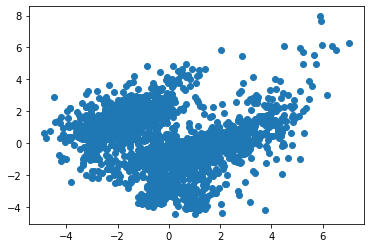

In [ ]:
data_dr = pca.transform(scaled_data)
plt.scatter(data_dr[:,0], data_dr[:,1])

**6. Kmeans Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer

# testing Silhouetter Score for PCA transformed data
for x in range(2,15):
  kmeans = KMeans(n_clusters=x)
  kmeans.fit(data_dr)
  cluster_kmeans = kmeans.predict(data_dr)
  silhouetteScore = silhouette_score(data_dr, cluster_kmeans, metric='euclidean')
  print('Silhouetter Score of', x, 'clusters:', silhouetteScore)

ImportError: ignored

In [ ]:
# Silhouetter plot for PCA transformed data
kmeans = KMeans(n_clusters=2)
silhouette_visualizer(kmeans, data_dr, colors='yellowbrick')

In [ ]:
# testing Silhouetter Score for data without PCA transformation
for x in range(2,15):
  kmeans = KMeans(n_clusters=x)
  kmeans.fit(data_noid)
  cluster_kmeans = kmeans.predict(data_noid)
  silhouetteScore = silhouette_score(data_noid, cluster_kmeans, metric='euclidean')
  print('Silhouetter Score of', x, 'clusters:', silhouetteScore)

Silhouetter Score of 2 clusters: 0.44168698947601104
Silhouetter Score of 3 clusters: 0.3996974542444039
Silhouetter Score of 4 clusters: 0.36515882184637455
Silhouetter Score of 5 clusters: 0.34254184612397315
Silhouetter Score of 6 clusters: 0.29182759450409423
Silhouetter Score of 7 clusters: 0.2960572437684796
Silhouetter Score of 8 clusters: 0.2869169439390524
Silhouetter Score of 9 clusters: 0.28395019913003167
Silhouetter Score of 10 clusters: 0.2850348464447806
Silhouetter Score of 11 clusters: 0.2802807236148631
Silhouetter Score of 12 clusters: 0.27545723175519576
Silhouetter Score of 13 clusters: 0.25278010328266187
Silhouetter Score of 14 clusters: 0.2480370820494426


In [ ]:
# Silhouetter plot for data without PCA transformation
kmeans = KMeans(n_clusters=2)
silhouette_visualizer(kmeans, data_noid, colors='yellowbrick')

NameError: ignored

The silhouette coefficient for data without PCA transformation is higher. So we will not use PCA transformed data.

The silhouette coefficient drops as the number of clusters increases. So we will say n_clusters = 2 is a more reasonable classification.

Below we use Kmeans to try to pick up the 2 clusters.

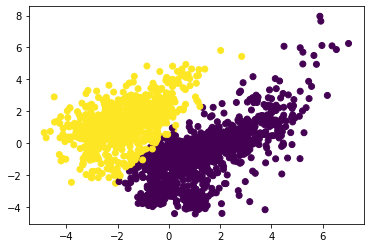

In [ ]:
# use Kmeans to pick the clusters up for PCA transformed data

kmeans = KMeans(n_clusters=2)
kmeans.fit(data_dr)
cluster_kmeans = kmeans.predict(data_dr)

plt.scatter(data_dr[:, 0], data_dr[:, 1], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters

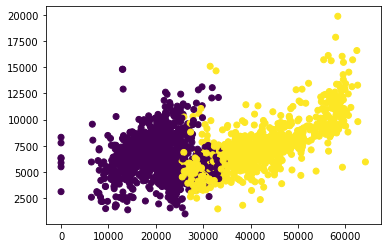

In [ ]:
# use Kmeans to pick the clusters up for data without PCA transformation
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_noid)
cluster_kmeans = kmeans.predict(data_noid)
cluster_college = kmeans.predict(data_noid)

# Since the data is not two-dimensional, we are showing an example of the plots by selecting two columns: 'COSTT4' and 'AVGFACSAL'
plt.scatter(data_noid['COSTT4'], data_noid['AVGFACSAL'], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters

Now let's create a new dataframe to contain the clustering result. 

In [ ]:
collegeCluster = dataNA.copy(deep=True)
collegeCluster['cluster'] = cluster_college
collegeCluster

,UNITID,CONTROL,LOCALE,CCSIZSET,DISTANCEONLY,NPT4_PUBPRIV,NPT41_PUBPRIV,NUM4_PUBPRIV,COSTT4,PFTFAC,AVGFACSAL,TUITFTE,INEXPFTE,C150_4_POOLED,PCTFLOAN,cluster
0,100654,1,12.0,14.0,0.0,13415.0,12683.0,607.0,18888.0,0.8856,7079.0,9063.0,7459.0,0.308718,0.8204,0
1,100663,1,12.0,15.0,0.0,14805.0,12361.0,893.0,19990.0,0.9106,10170.0,9033.0,17208.0,0.508550,0.5397,0
2,100690,2,12.0,6.0,0.0,7455.0,6736.0,9.0,12300.0,0.6721,3849.0,12057.0,5123.0,0.285738,0.7629,0
3,100706,1,12.0,12.0,0.0,17520.0,14652.0,294.0,20306.0,0.6555,9341.0,8322.0,9352.0,0.478211,0.4728,0
4,100724,1,12.0,13.0,0.0,11936.0,12342.0,889.0,17400.0,0.6641,6557.0,7813.0,7393.0,0.257482,0.8735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6237,451741,2,21.0,2.0,0.0,7176.0,7115.0,144.0,11439.0,0.0656,1665.0,3756.0,1195.0,0.588048,0.0000,0
6238,451750,3,21.0,6.0,0.0,15156.0,14893.0,32.0,21006.0,0.4103,5717.0,13399.0,5489.0,0.217962,0.9010,0
6239,451769,3,41.0,6.0,0.0,20692.0,17204.0,21.0,26754.0,0.2683,3931.0,22335.0,5171.0,0.396600,0.7786,1
6289,454184,2,11.0,8.0,0.0,23910.0,22175.0,133.0,44720.0,0.5455,8189.0,10778.0,10645.0,0.590136,0.6151,1


**7. Interpretation**

In [ ]:
collegeCluster.head(50) # Print the first 50 rows to observe the pattern

,UNITID,CONTROL,LOCALE,CCSIZSET,DISTANCEONLY,NPT4_PUBPRIV,NPT41_PUBPRIV,NUM4_PUBPRIV,COSTT4,PFTFAC,AVGFACSAL,TUITFTE,INEXPFTE,C150_4_POOLED,PCTFLOAN,cluster
0,100654,1,12.0,14.0,0.0,13415.0,12683.0,607.0,18888.0,0.8856,7079.0,9063.0,7459.0,0.308718,0.8204,0
1,100663,1,12.0,15.0,0.0,14805.0,12361.0,893.0,19990.0,0.9106,10170.0,9033.0,17208.0,0.508550,0.5397,0
2,100690,2,12.0,6.0,0.0,7455.0,6736.0,9.0,12300.0,0.6721,3849.0,12057.0,5123.0,0.285738,0.7629,0
3,100706,1,12.0,12.0,0.0,17520.0,14652.0,294.0,20306.0,0.6555,9341.0,8322.0,9352.0,0.478211,0.4728,0
4,100724,1,12.0,13.0,0.0,11936.0,12342.0,889.0,17400.0,0.6641,6557.0,7813.0,7393.0,0.257482,0.8735,0
5,100751,1,13.0,16.0,0.0,20916.0,17206.0,1440.0,26717.0,0.7109,9605.0,12198.0,9817.0,0.666009,0.4148,0
8,100830,1,12.0,12.0,0.0,11915.0,9044.0,395.0,16556.0,0.9262,7173.0,7625.0,6817.0,0.285309,0.6476,0
9,100858,1,13.0,15.0,0.0,17541.0,13191.0,855.0,23788.0,0.8780,9429.0,13186.0,11324.0,0.680930,0.3610,0
10,100937,2,12.0,11.0,0.0,22994.0,15741.0,261.0,44512.0,0.6479,7513.0,11928.0,9990.0,0.633327,0.4939,1
12,101073,2,32.0,8.0,0.0,12686.0,11727.0,156.0,17655.0,0.5833,5720.0,6023.0,6652.0,0.134844,0.9100,0


Get descriptive data to understand and compare the 2 clusters.

In [ ]:
cluster_0 = collegeCluster[collegeCluster['cluster'] == 0]
cluster_1 = collegeCluster[collegeCluster['cluster'] == 1]

In [ ]:
cluster_0.describe()

,UNITID,CONTROL,LOCALE,CCSIZSET,DISTANCEONLY,NPT4_PUBPRIV,NPT41_PUBPRIV,NUM4_PUBPRIV,COSTT4,PFTFAC,AVGFACSAL,TUITFTE,INEXPFTE,C150_4_POOLED,PCTFLOAN,cluster
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.0
mean,206653.461754,1.552239,21.117537,10.314366,0.004664,13654.768657,11355.563433,632.274254,20437.805970,0.632267,6449.888993,8018.287313,6935.415112,0.414219,0.564977,0.0
std,81939.480669,0.728937,9.988377,4.111774,0.068167,4628.482901,4665.788846,808.016528,5983.809321,0.285073,2059.215326,4116.608313,3624.728820,0.177613,0.216501,0.0
min,100654.000000,1.000000,11.000000,1.000000,0.000000,0.000000,-769.000000,0.000000,0.000000,0.018000,1000.000000,41.000000,394.000000,0.000000,0.000000,0.0
25%,155330.500000,1.000000,12.000000,8.000000,0.000000,10467.250000,8108.750000,135.500000,16427.750000,0.414825,5047.500000,5090.750000,4695.000000,0.289978,0.435225,0.0
50%,196107.500000,1.000000,21.000000,11.000000,0.000000,14227.500000,10879.000000,322.000000,20467.000000,0.657850,6361.000000,7488.500000,6560.500000,0.409166,0.589100,0.0
75%,228709.500000,2.000000,32.000000,13.000000,0.000000,17128.500000,14565.500000,880.250000,24286.250000,0.885300,7705.750000,10693.750000,8409.250000,0.523934,0.718875,0.0
max,451750.000000,3.000000,43.000000,17.000000,1.000000,25358.000000,25358.000000,13183.000000,34593.000000,1.000000,14803.000000,41526.000000,33092.000000,1.000000,1.000000,0.0


In [ ]:
cluster_1.describe()

,UNITID,CONTROL,LOCALE,CCSIZSET,DISTANCEONLY,NPT4_PUBPRIV,NPT41_PUBPRIV,NUM4_PUBPRIV,COSTT4,PFTFAC,AVGFACSAL,TUITFTE,INEXPFTE,C150_4_POOLED,PCTFLOAN,cluster
count,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.000000,809.0
mean,201603.168109,2.095179,19.391842,10.453646,0.001236,24020.368356,18920.929543,373.562423,41975.469716,0.652946,7432.279357,17358.516687,11349.433869,0.589456,0.643890,1.0
std,77703.021866,0.336830,9.032175,3.377728,0.035158,4915.722073,5462.167665,384.073746,9270.776903,0.286032,2401.136912,5664.737752,10183.108993,0.183745,0.167199,0.0
min,100937.000000,1.000000,11.000000,1.000000,0.000000,8413.000000,0.000000,1.000000,25553.000000,0.020800,1476.000000,3605.000000,993.000000,0.031275,0.029000,1.0
25%,153834.000000,2.000000,12.000000,9.000000,0.000000,20486.000000,15807.000000,154.000000,34898.000000,0.435700,5797.000000,13049.000000,6547.000000,0.461292,0.559800,1.0
50%,191533.000000,2.000000,21.000000,11.000000,0.000000,23352.000000,18873.000000,278.000000,40835.000000,0.666700,7078.000000,16437.000000,8922.000000,0.582676,0.674600,1.0
75%,217156.000000,2.000000,22.000000,13.000000,0.000000,26894.000000,22292.000000,465.000000,47922.000000,0.952700,8532.000000,20700.000000,12547.000000,0.723945,0.761000,1.0
max,456348.000000,3.000000,43.000000,17.000000,1.000000,41874.000000,41743.000000,3139.000000,64233.000000,1.000000,19862.000000,44463.000000,106214.000000,0.972133,1.000000,1.0


Based on the description of two clusters, we can see some differences in between.

> The first difference is in “CONTROL” which stands for “control of institution”. The mean score for cluster 0 is 1.552239 and 2.095179 for cluster 1. If we pay more attention to the 25% and 50% percentile, the value for cluster 0 is 1 and 2 for cluster 1. This means that cluster 0 contains much more public schools while cluster 1 have more private schools.

> There is a slight difference in “LOCALE” which represents the “locale of institution”. The mean score for cluster 0 is 21.117537 and 19.391842 for cluster 1. If we look at the 75% percentile, the value for cluster 0 is 32 and 22 for cluster 1. This means that cluster 0 contains schools that are relatively more rural while cluster 1 have schools that are more urbanized.

> “NPT4_PUBPRIV” represent the average net price for Title IV institutions. The mean score for cluster 0 is 13654.768657 which is much lower than the 24020.368356 for cluster 1. The difference in the maximum is also great for cluster 0 is 25358 which is almost half than the 41874 for cluster 1. The 25%, 50%, and 75% percentile for cluster 0 is also much lower than cluster 1. This means the average net price are much higher for those institutions in cluster 1 than cluster 0.

> As the organization’s mission is to increase college graduation rates for underprivileged populations, we looked at “NPT41_PUBPRIV” which represents the average net price for 0-30,000 family income trying to gain more perspectives. The mean score for cluster 0 is 11355.563433 which is again much lower than the 18920.929543 for cluster 1. The difference in the maximum is also great as cluster 0 is 25358 which is almost half than the 41743 for cluster 1. The 25%, 50%, and 75% percentile for cluster 0, once again, is also much lower than cluster 1.  This means the average net price for 0-30,000 family income (the lower income family) is much higher for those institutions in cluster 1 than cluster 0.

> We also looked at “NUM4_PUBPRIV” which stands for the number of Title IV students. Title IV is Federal Student Financial Aid. It is funds the government allows the student to apply for to assist the student with college tuition and expenses including any postsecondary education tuition and costs. The mean score for cluster 0 is 632.274254 which is much higher than the 373.562423 for cluster 1. The difference in the maximum is also great as cluster 0 is 13183 which is almost four times the 3139 for cluster 1. The 75% percentile for cluster 0 (880.25) also double the number for cluster 1 (465). This means there are much more Title IV students who are able to apply for funds in cluster 0 than in cluster 1.

> Now let’s look at “COSTT4” which is the average cost of attendance. The mean score for cluster 0 is 20437.805970 which is about half of the 25553 for cluster 1. The differences in the maximum and minimum are also great as cluster 0 have a minimum of 0 and cluster 1 have a minimum of 25553. The maximum for cluster 0 is 34593 while 64233 for cluster 1. The 25%, 50%, and 75% percentile for cluster 0 are also almost half of what they are for cluster 1. This means that the average cost of attendance is once again much more expensive for the cluster 1 institution than cluster 0 institutions.

> “AVGFACSAL” is the average faculty salary. The difference between the two clusters is not as substantial as the other variables. However cluster 0 still have a lower mean of 6449.888993 compared to the 7432.279357 for cluster 1. The minimum, maximum and the 25%, 50%, and 75% percentile also reflects the difference. The faculty members in the cluster 1 institutions enjoys a higher average faculty salary than those in the cluster 0 institutions.

> “TUITFTE” is the net tuition revenue per full-time equivalent student. The mean for cluster 0 is 8018.287313 while the mean for cluster 1 is 17358.516687. Even though the maximum for the two clusters didn’t differ much, the minimum, 25%, 50%, and 75% percentile are all much higher in cluster 1 than in cluster 0. This means the net tuition revenue per full-time equivalent student is higher in cluster 1 than in cluster 0.

> “INEXPFTE” tells us about the instructional expenditures per full-time equivalent student. The mean, minimum, maximum, 25%, 50%, and 75% percentile are all much higher in cluster 0 than in cluster 1. This showed that the instructional expenditures are way higher in cluster 1 than in cluster 0.

> “C150_4_POOLED” gave us information on completion rate. The mean for the clusters didn’t differ much as cluster 0 is 0.414219 and cluster 1 is 0.589456. However, the 25%, 50%, and 75% percentile bring in some concern as the numbers for cluster 0 is much lower than cluster 1. Cluster 0 has a completion rate of 0.523934 in the 75% percentile while cluster 1 is 0.723945. Cluster 1 enjoys a higher completion rate than cluster 0.

> “PCTFLOAN” is the percent of all federal undergraduate students receiving a federal student loan. The mean for cluster 0 is 0.564877 which is lower than the 0.64389 for cluster 1. Cluster 1 has a slightly higher percent of federal undergraduate students receiving a federal student loan.

In [ ]:
# display the cluster labels corresponding to UNITID
print(collegeCluster[['UNITID','cluster']])

      UNITID  cluster
0     100654        0
1     100663        0
2     100690        0
3     100706        0
4     100724        0
...      ...      ...
6237  451741        0
6238  451750        0
6239  451769        1
6289  454184        1
6456  456348        1

[1881 rows x 2 columns]


**8. Conclusion**

From the Kmeans clustering, we have grouped our list of universities into two big groups based on the variables we picked.

Even though we cannot tell how significant the differences are at this point, we can clearly see the difference between the two clusters.

Cluster 1 have more private schools and are more urbanized compared to cluster 0. The average net price is much higher for those institutions in cluster 1 than cluster 0. This holds true in the lower income family as well. The average cost of attendance, net tuition revenue, and instructional expenditures are once again much more expensive for the cluster 1 institution than cluster 0 institutions. The faculty members in the cluster 1 institutions enjoys a higher average faculty salary than those in the cluster 0 institutions. There are much more Title IV students in cluster 0 than in cluster 1. Cluster 1 has a slightly higher percent of federal undergraduate students receiving a federal student loan. Cluster 1 enjoys a higher completion rate than cluster 0.
